In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData
from  wfslib.shift_detector import translation
import pickle

In [2]:
translation

<function wfslib.shift_detector.translation>

In [3]:
def accuracy(original, getted):
    N = len(original)
    accuracy = (getted==answer).all(axis = 1)
    right = len(np.where(accuracy == True)[0])
    return right/N *100

def distation(original, getted):
    dst = distance.euclidean(original.ravel(), getted.ravel())
    return dst

../..\wfslib\wfs.py:136: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


{'border': 16.0, 'cell_width': 200.0, 'start_point': [286, 289]}


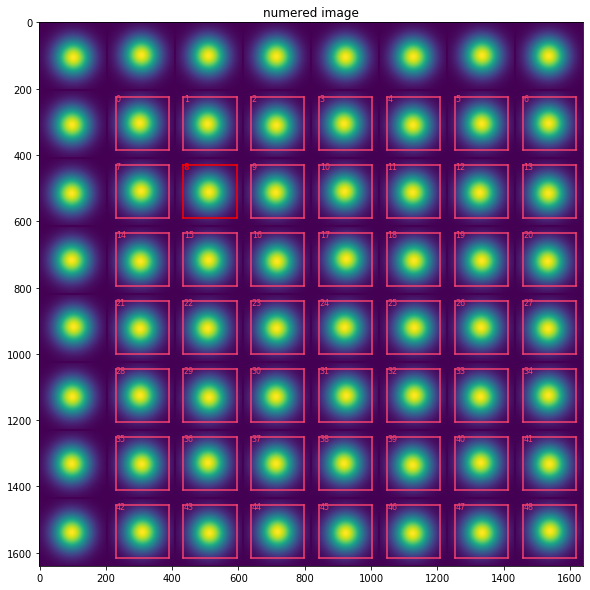

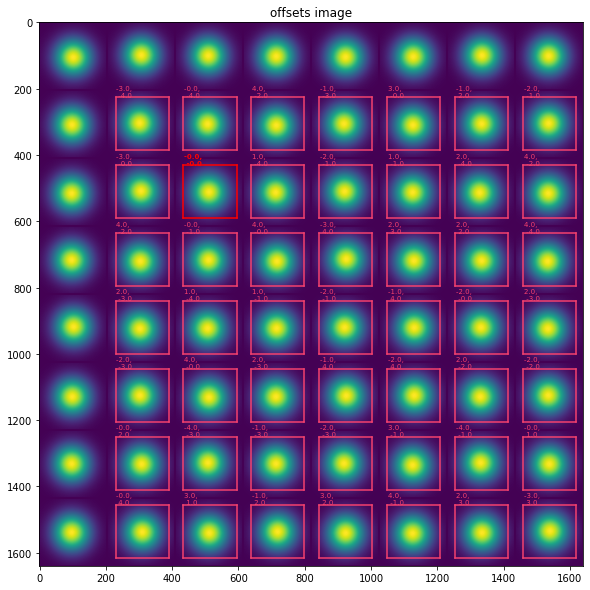

Accuracy on 38-sigma noised data: 100.000000


In [4]:
sigma = 38
path = "../data/synthetic_data/0_%d_test.npy"%sigma
answer_path = "../data/synthetic_data/0_test.pkl"
arr = np.load(path)
wfs = WFSData(arr)

print(wfs.geometry.options)
wfs.geometry.set_options(border = 45, cell_width = 160, shift = (100, 100))
wfs.reference = 8
#wfs.domask = True
#plt.imshow(arr[0])
wfs.show_geometry()
wfs.show_geometry(show_type = "offsets")
with open(answer_path, 'rb') as f:
    answer = pickle.load(f)
answer = answer[1:,1:].reshape(-1,2)
getted = np.asarray(wfs.offsets())

print("Accuracy on %d-sigma noised data: %f"%(sigma, accuracy(answer, getted)))


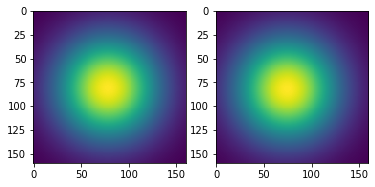

In [5]:
wfs.mask = True
plt.subplot(1,2,1)
plt.imshow(wfs[0][8])
plt.subplot(1,2,2)
plt.imshow(wfs[0][22])

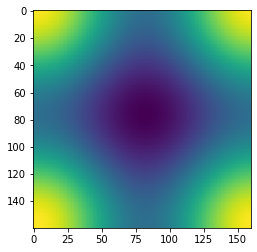

In [6]:
ref1 = wfs[0][8]
ref2 = wfs[0][2]

s = np.abs(np.fft.ifft2(np.fft.fft2(ref1) * np.conjugate(np.fft.fft2(ref2))))
plt.imshow(s)

### Считаем скорость для разных способов

In [7]:
import datetime

In [8]:
def speed_test(function, args):
    a = datetime.datetime.now()
    function(*args)
    b = datetime.datetime.now()
    return (b-a).microseconds

In [9]:

def translation2(ref1, ref2):
    ref1fft = np.fft.fft2(ref1)
    s = np.abs(np.fft.ifft2(ref1fft * np.conjugate(np.fft.fft2(ref2))))
    x, y = np.where(s == np.min(s))
    return x, y


In [10]:
from skimage.feature import register_translation

In [11]:
detected_shift = register_translation(ref1, ref2) 


In [12]:
a,b,c = 0,0,0
e = 1000
for i in range(e):
    a+=speed_test(translation2, [ref1, ref2])
    b+=speed_test(register_translation, [ref1, ref2])
    c+=speed_test(translation, [ref1, ref2])
    
print(a/e, b/e, c/e)

2220.83 2322.159 2470.063
